In [1]:
import pandas as pd

file_path = r"D:\Excelr\Data Science\Data Science Assignment\Naive Bayes and Text Mining\Naive Bayes and Text Mining\blogs_categories.csv"
data = pd.read_csv(file_path)

data_info = data.info()
# missing values
missing_values = data.isnull().sum()
# unique categories in the 'Labels' column
unique_labels = data['Labels'].unique()
# Display results
data_info, missing_values, unique_labels

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


(None,
 Unnamed: 0    0
 Data          0
 Labels        0
 dtype: int64,
 array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
        'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
        'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
        'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
        'sci.electronics', 'sci.med', 'sci.space',
        'soc.religion.christian', 'talk.politics.guns',
        'talk.politics.mideast', 'talk.politics.misc',
        'talk.religion.misc'], dtype=object))

In [2]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Downloading necessary NLTK resources for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')
# stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
# Remove unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0'])
# Text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)
# cleaning function to the 'Data' column
data_cleaned['Cleaned_Data'] = data_cleaned['Data'].apply(clean_text)

data_cleaned[['Data', 'Cleaned_Data']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Data,Cleaned_Data
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism51121 soc...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
# TF-IDF to the cleaned data
X = tfidf_vectorizer.fit_transform(data_cleaned['Cleaned_Data']).toarray()
# Labels (target variable)
y = data_cleaned['Labels']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# shape of the resulting data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (15997, 5000)
Testing data shape: (4000, 5000)


In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Naive Bayes model
nb_model = MultinomialNB()
# Train the model
nb_model.fit(X_train, y_train)
# predictions on the test set
y_pred = nb_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8755
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.71      0.78      0.74       173
           comp.graphics       0.76      0.88      0.82       179
 comp.os.ms-windows.misc       0.87      0.87      0.87       226
comp.sys.ibm.pc.hardware       0.84      0.79      0.82       204
   comp.sys.mac.hardware       0.87      0.92      0.90       205
          comp.windows.x       0.92      0.91      0.92       186
            misc.forsale       0.83      0.88      0.86       190
               rec.autos       0.92      0.92      0.92       203
         rec.motorcycles       0.98      0.92      0.95       218
      rec.sport.baseball       0.96      0.97      0.97       192
        rec.sport.hockey       0.98      0.98      0.98       203
               sci.crypt       0.95      0.94      0.94       200
         sci.electronics       0.93      0.88      0.90       227
                 sci.med       0.9

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# TF-IDF to the cleaned data
X = tfidf_vectorizer.fit_transform(data_cleaned['Cleaned_Data']).toarray()
# Labels (target variable)
y = data_cleaned['Labels']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Naive Bayes model
nb_model = MultinomialNB()
# Train the model on the training set
nb_model.fit(X_train, y_train)

MultinomialNB()

In [7]:
# predictions on the test set
y_pred = nb_model.predict(X_test)
# model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8755
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.71      0.78      0.74       173
           comp.graphics       0.76      0.88      0.82       179
 comp.os.ms-windows.misc       0.87      0.87      0.87       226
comp.sys.ibm.pc.hardware       0.84      0.79      0.82       204
   comp.sys.mac.hardware       0.87      0.92      0.90       205
          comp.windows.x       0.92      0.91      0.92       186
            misc.forsale       0.83      0.88      0.86       190
               rec.autos       0.92      0.92      0.92       203
         rec.motorcycles       0.98      0.92      0.95       218
      rec.sport.baseball       0.96      0.97      0.97       192
        rec.sport.hockey       0.98      0.98      0.98       203
               sci.crypt       0.95      0.94      0.94       200
         sci.electronics       0.93      0.88      0.90       227
                 sci.med       0.9

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# sentiment analyzer
sid = SentimentIntensityAnalyzer()
# sentiment based on the compound score
def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
# sentiment analysis on the 'Data' column
data_cleaned['Sentiment'] = data_cleaned['Data'].apply(get_sentiment)

data_cleaned[['Data', 'Sentiment']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Data,Sentiment
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,positive
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,positive
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,negative
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,negative


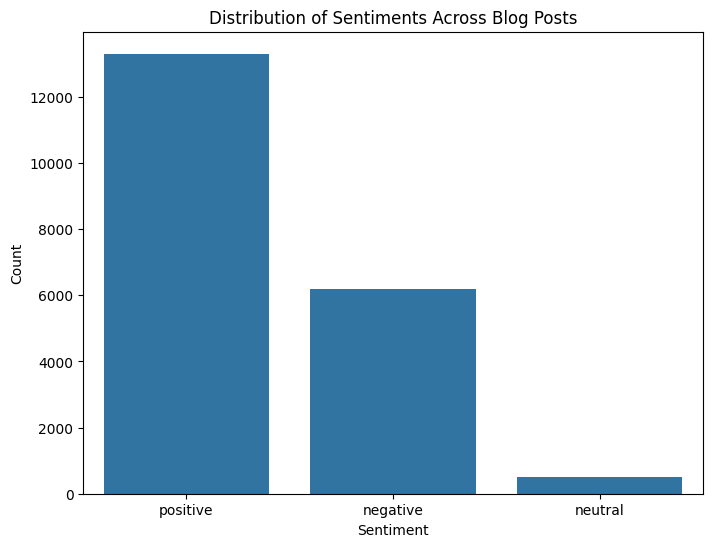

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution across all blog posts
sentiment_dist = data_cleaned['Sentiment'].value_counts()
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values)
plt.title('Distribution of Sentiments Across Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

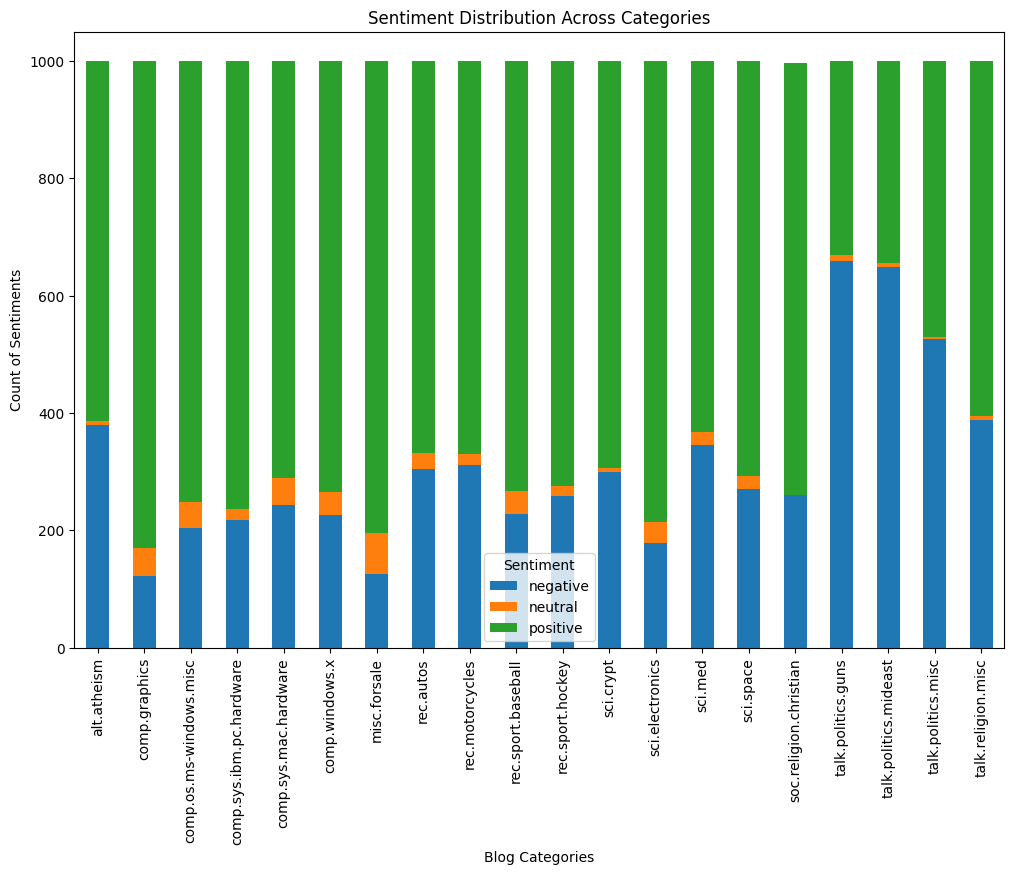

In [10]:
# Group by category and sentiment
category_sentiment_dist = data_cleaned.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
# Plot sentiment distribution per category
category_sentiment_dist.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Blog Categories')
plt.ylabel('Count of Sentiments')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# classification report with precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix to analyze the results in detail
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.88
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.71      0.78      0.74       173
           comp.graphics       0.76      0.88      0.82       179
 comp.os.ms-windows.misc       0.87      0.87      0.87       226
comp.sys.ibm.pc.hardware       0.84      0.79      0.82       204
   comp.sys.mac.hardware       0.87      0.92      0.90       205
          comp.windows.x       0.92      0.91      0.92       186
            misc.forsale       0.83      0.88      0.86       190
               rec.autos       0.92      0.92      0.92       203
         rec.motorcycles       0.98      0.92      0.95       218
      rec.sport.baseball       0.96      0.97      0.97       192
        rec.sport.hockey       0.98      0.98      0.98       203
               sci.crypt       0.95      0.94      0.94       200
         sci.electronics       0.93      0.88      0.90       227
                 sci.med       0.96 